In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [3]:
record.shape

(710, 16)

## Extract sessions

In [4]:
K7 = record[((record['Mouse ID']=='K7') & (record['p(high Port)'] > 0))].copy()
K9 = record[((record['Mouse ID']=='K9') & (record['p(high Port)'] > 0))].copy()
K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()

q43_ = record[(((record['Mouse ID']=='q43') |(record['Mouse ID']=='Q43')) & (record['p(high Port)'] > 0))].copy()
q45_ = record[(((record['Mouse ID']=='q45') |(record['Mouse ID']=='Q45')) & (record['p(high Port)'] > 0))].copy()
K1_ = record[((record['Mouse ID']=='K1') & (record['p(high Port)'] > 0))].copy()
K1 = K1_.loc[543:].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

mice = [K7,K9,K13,K1,q43,q45]

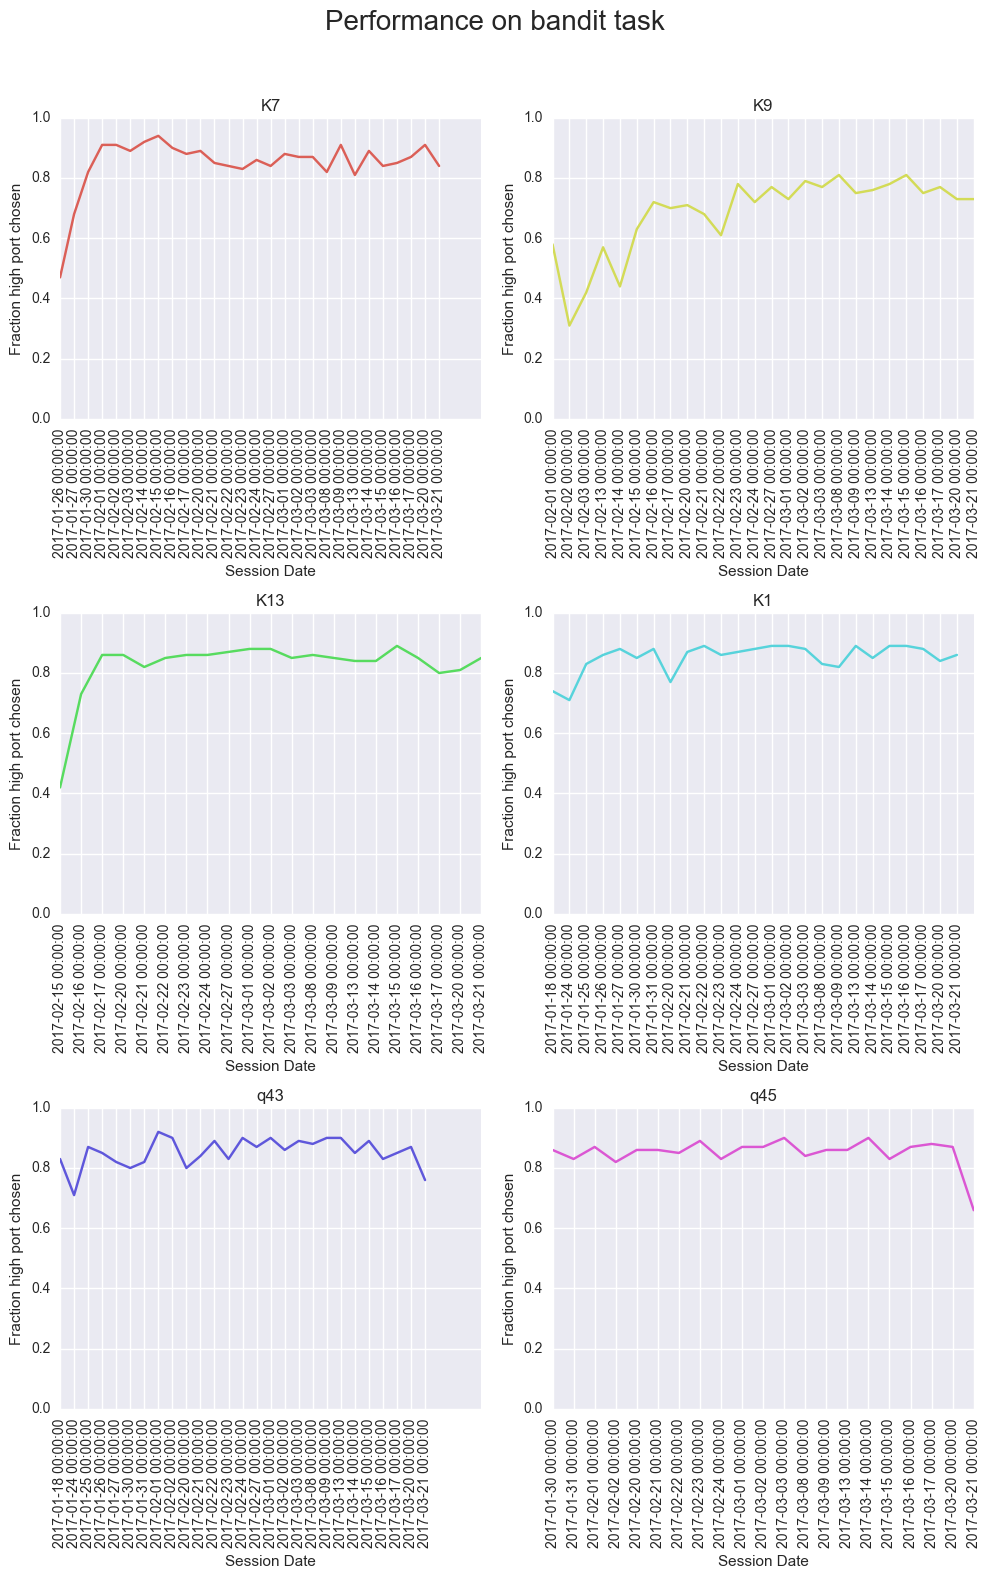

In [5]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,15))
plt.suptitle('Performance on bandit task',x=0.5,y=1.05,fontsize=20)

for i,mouse in enumerate(mice):
    
    #extract the dates
    dates = []
    for date in mouse['Date'].values:
        dates.append(str(date))
    
    plt.subplot(3,2,i+1)
    plt.title(mouse['Mouse ID'].values[0])
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    plt.xticks(range(mouse.shape[0]),mouse['Date'].values,rotation=90)
    plt.ylim(0,1)
    plt.xlabel('Session Date')
    plt.ylabel('Fraction high port chosen')
    plt.ylim(0,1.0)

plt.tight_layout()

In [6]:
record.tail(10)

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
700,03202017_K7,K7,2017-03-20 00:00:00,2.0,0.8,0.2,50.0,50.0,610.0,8.0,447.0,0.91,2.0,1.0,35.0,35.0
701,03202017_K9,K9,2017-03-20 00:00:00,2.0,0.1,0.9,50.0,50.0,581.0,8.0,404.0,0.73,2.0,1.0,35.0,35.0
702,03202017_Q43,Q43,2017-03-20 00:00:00,2.0,0.2,0.8,50.0,50.0,516.0,7.0,377.0,0.87,2.0,1.0,35.0,35.0
703,03202017_Q45,Q45,2017-03-20 00:00:00,2.0,0.8,0.2,50.0,50.0,709.0,10.0,521.0,0.87,2.0,1.0,35.0,35.0
704,03212017_K1,K1,2017-03-21 00:00:00,2.0,0.2,0.8,50.0,50.0,569.0,8.0,400.0,0.86,2.0,1.0,35.0,35.0
705,03212017_K13,K13,2017-03-21 00:00:00,2.0,0.3,0.7,50.0,50.0,460.0,6.0,309.0,0.85,2.0,1.0,35.0,35.0
706,03212017_K7,K7,2017-03-21 00:00:00,2.0,0.2,0.8,50.0,50.0,570.0,8.0,400.0,0.84,2.0,1.0,35.0,35.0
707,03212017_K9,K9,2017-03-21 00:00:00,2.0,0.1,0.9,50.0,50.0,345.0,4.0,229.0,0.73,2.0,1.0,35.0,35.0
708,03212017_Q43,Q43,2017-03-21 00:00:00,2.0,0.7,0.3,50.0,50.0,567.0,7.0,350.0,0.76,2.0,1.0,35.0,35.0
709,03212017_Q45,Q45,2017-03-21 00:00:00,2.0,0.7,0.3,50.0,50.0,790.0,9.0,454.0,0.66,2.0,1.0,35.0,35.0
